Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastparquet import ParquetFile
import seaborn as sns

Загрузка данных

In [2]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642


EDA

In [82]:
pd.set_option('display.max_columns', None)
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,feature51,feature52,feature53,feature54,feature55,feature56,feature57,feature58,feature59,feature60,feature61,feature62,feature63,feature64,feature65,feature66,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83,feature84,feature85,feature86,feature87,feature88,feature89,feature90,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100,feature101,feature102,feature103,feature104,feature105,feature106,feature107,feature108,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118,feature119,feature120,feature121,feature122,feature123,feature124,feature125,feature126,feature127,feature128,feature129,feature130,feature131,feature132,feature133,feature134,feature135,feature136,feature137,feature138,feature139,feature140,feature141,feature142,feature143,feature144,feature145,feature146,feature147,feature148,feature149,feature150,feature151,feature152,feature153,feature154,feature155,feature156,feature157,feature158,feature159,feature160,feature161,feature162,feature163,feature164,feature165,feature166,feature167,feature168,feature169,feature170,feature171,feature172,feature173,feature174,feature175,feature176,feature177,feature178,feature179,feature180,feature181,feature182,feature183,feature184,feature185,feature186,feature187,feature188,feature189,feature190,feature191,feature192,feature193,feature194,feature195,feature196,feature197,feature198,feature199,feature200,feature201,feature202,feature203,feature204,feature205,feature206,feature207,feature208,feature209,feature210,feature211,feature212,feature213,feature214,feature215,feature216,feature217,feature218,feature219,feature220,feature221,feature222,feature223,feature224,feature225,feature226,feature227,feature228,feature229,feature230,feature231,feature232,feature233,feature234,feature235,feature236,feature237,feature238,feature239,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,feature250,feature251,feature252,feature253,feature254,feature255,feature256,feature257,feature258,feature259,feature260,feature261,feature262,feature263,feature264,feature265,feature266,feature267,feature268,feature269,feature270,feature271,feature272,feature273,feature274,feature275,feature276,feature277,feature278,feature279,feature280,feature281,feature282,feature283,feature284,feature285,feature286,feature287,feature288,feature289,feature290,feature291,feature292,feature293,feature294,feature295,feature296,feature297,feature298,feature299,feature300,feature301,feature302,feature303,feature304,feature305,feature306,feature307,feature308,feature309,feature310,feature311,feature312,feature313,feature314,feature315,feature316,feature317,feature318,feature319,feature320,feature321,feature322,feature323,feature324,feature325,feature326,feature327,feature328,feature329,feature330,feature331,feature332,feature333,feature334,feature335,feature336,feature337,feature338,feature339,feature340,feature341,feature342,feature343,feature344,feature345,feature346,feature347,feature348,feature349,feature350,feature351,feature352,feature353,feature354,feature355,feature356,feature357,feature358,feature359,feature360,feature361,feature362,feature363,feature364,feature365,feature366,feature367,feature368,feature369,feature370,feature371,feature372,feature373,feat

In [87]:
df['feature29'].nunique()

241

In [89]:
df['feature37'].nunique()

65129

In [ ]:
unique_counts = df.nunique()
columns_with_few_unique_values = unique_counts[unique_counts < 10]

In [107]:
columns_with_few_unique_values

Index(['feature23', 'feature26', 'feature27', 'feature28', 'feature68',
       'feature69', 'feature144', 'feature160', 'feature232', 'feature235',
       ...
       'feature1028', 'feature1029', 'feature1030', 'feature1031',
       'feature1032', 'feature1033', 'feature1034', 'feature1037',
       'feature1044', 'feature1058'],
      dtype='object', length=300)

In [91]:
df['feature37'].value_counts()

feature37
85495    402507
0         20684
1          2339
2          1356
3           942
          ...  
33192         1
11142         1
55942         1
53681         1
81702         1
Name: count, Length: 65129, dtype: int64

In [93]:
df['feature37'].std()

27607.199215785236

In [94]:
df['feature37'].mean()

72460.2599482309

<Axes: >

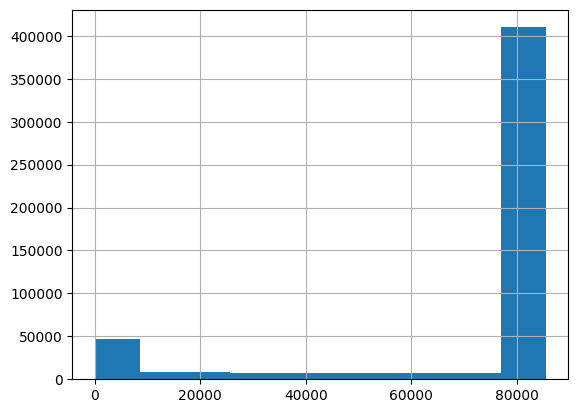

In [88]:
df['feature37'].hist()

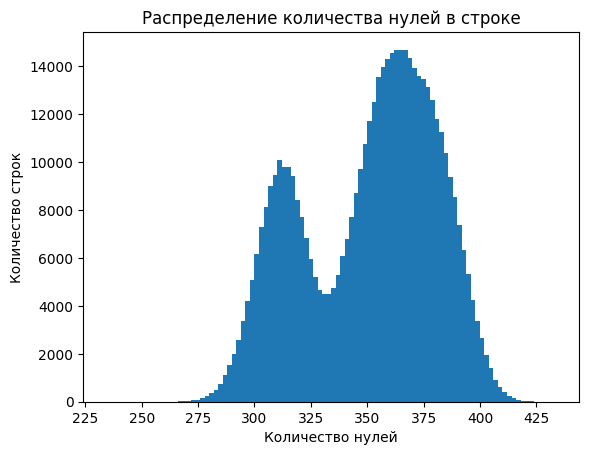

In [3]:
df['count_zero_in_row'] = df.apply(lambda row: row.tolist().count(0), axis=1)
df['count_zero_in_row'].unique()

condition = df['target'] == 0
plt.hist(df.loc[condition, 'count_zero_in_row'], bins = 100)
plt.title('Распределение количества нулей в строке в соответ с таргет 0')
plt.xlabel('Количество нулей')
plt.ylabel('Количество строк')
plt.show()

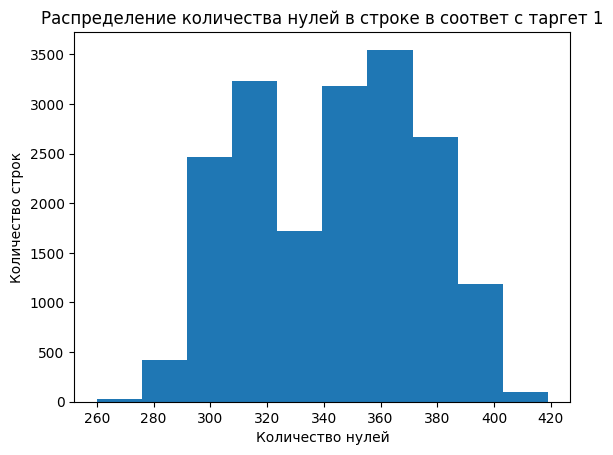

In [6]:
df['count_zero_in_row'] = df.apply(lambda row: row.tolist().count(0), axis=1)
df['count_zero_in_row'].unique()

condition = df['target'] == 1
plt.hist(df.loc[condition, 'count_zero_in_row'], bins = 10)
plt.title('Распределение количества нулей в строке в соответ с таргет 1')
plt.xlabel('Количество нулей')
plt.ylabel('Количество строк')
plt.show()

In [3]:
# Удаление столбца, где все значения - None
df = df.drop('feature756', axis=1)
df = df.drop('id', axis=1)
df = df.drop('target', axis = 1)
df = df.drop('sample_ml_new', axis = 1)
df = df.drop('feature642', axis = 1)

In [9]:
df['count_zero_in_row'] = df.apply(lambda row: row.tolist().count(0), axis=1)

In [12]:
df['count_zero_in_row'].unique()

array([361, 336, 341, 327, 382, 381, 374, 363, 369, 308, 323, 345, 296,
       352, 365, 301, 317, 306, 314, 360, 387, 386, 380, 367, 353, 342,
       321, 313, 356, 400, 303, 388, 292, 391, 348, 350, 344, 357, 316,
       402, 319, 338, 285, 354, 311, 364, 333, 294, 315, 307, 297, 393,
       366, 351, 359, 370, 375, 302, 372, 358, 371, 347, 379, 304, 332,
       378, 355, 324, 343, 399, 373, 349, 385, 337, 394, 362, 383, 368,
       326, 392, 339, 328, 289, 409, 346, 377, 376, 320, 390, 305, 318,
       283, 384, 335, 330, 284, 396, 300, 395, 310, 340, 293, 401, 309,
       389, 288, 322, 299, 290, 312, 298, 286, 397, 329, 295, 325, 398,
       331, 415, 334, 404, 282, 281, 416, 403, 287, 406, 407, 291, 408,
       277, 411, 405, 274, 413, 270, 278, 414, 412, 280, 275, 410, 267,
       425, 273, 279, 276, 263, 420, 271, 265, 419, 272, 264, 418, 261,
       421, 269, 266, 268, 417, 256, 233, 422, 260, 423, 262, 259, 432,
       424, 433, 429, 257, 426], dtype=int64)

In [7]:
df[df.columns[(df.nunique() == 2)]]

,target,feature235,feature242,feature245,feature384,feature385,feature386,feature387,feature388,feature389,...,feature792,feature793,feature794,feature795,feature796,feature797,feature798,feature1037,feature1044,feature1058
0,0,0,0,0,0,0,0,1,1,1,...,0,0,1,1,1,0,0,0,0,0
1,0,0,0,0,1,1,0,1,1,1,...,0,0,1,1,1,0,0,0,0,0
2,0,3,0,0,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
5,0,3,0,0,0,0,0,1,1,1,...,0,0,1,1,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,1,1,...,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693036,0,3,2,1,0,0,0,1,1,1,...,0,1,0,0,1,0,0,0,0,0
693038,0,3,2,1,0,0,0,1,1,1,...,1,1,0,1,1,0,0,19232,3901,10091
693039,0,3,2,1,0,0,0,1,1,1,...,1,1,0,1,1,0,0,19232,3901,10091
693040,0,3,2,1,0,0,0,1,1,1,...,0,1,0,0,1,0,0,19232,3901,10091


In [41]:
df[df.columns[(df.nunique() == 2)]].max().unique()

array([    3,     2,     1,     9, 19232,  3901, 10091], dtype=int64)

In [36]:
df['feature245'].std() #стандартное отклонение для бинарной колонки, где 0 и 1

0.44954245891419714

In [37]:
df['feature1058'].std() #стандартное отклонение для бинарной колонки, где 0 и большое значение

304.959379770206

In [39]:
df['feature33'].std() #стандартное отклонение для колонки с большой вариативностью (30000)

13156.304574909298

In [38]:
df['feature240'].std() # стандартное отклонение для колонки с низкой вариативностью (9)

7.417364109480261

In [70]:
# посмотрим распредление дисперсий колонок
stdd = df.sample(n=50000).std()
meann = df.sample(n=50000).mean()
mediann = df.sample(n=50000).median()

In [74]:
df['feature4'].value_counts()

feature4
105047    473
102273    425
102180    418
102339    391
102183    373
         ... 
70361       1
88794       1
62344       1
55112       1
168         1
Name: count, Length: 80146, dtype: int64

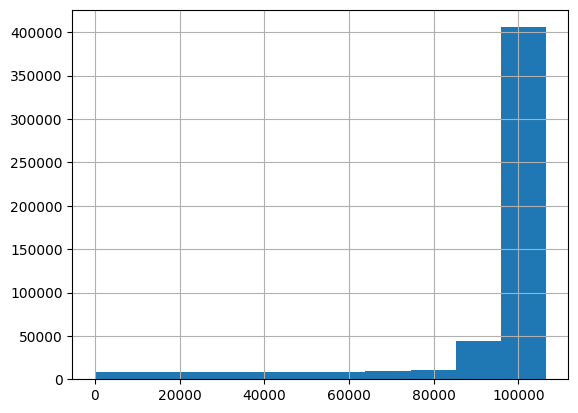

In [76]:
df['feature4'].hist()
plt.show()

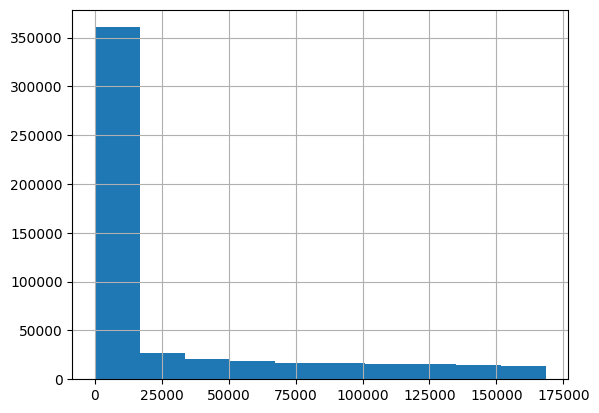

In [77]:
df['feature1069'].hist()

plt.show()

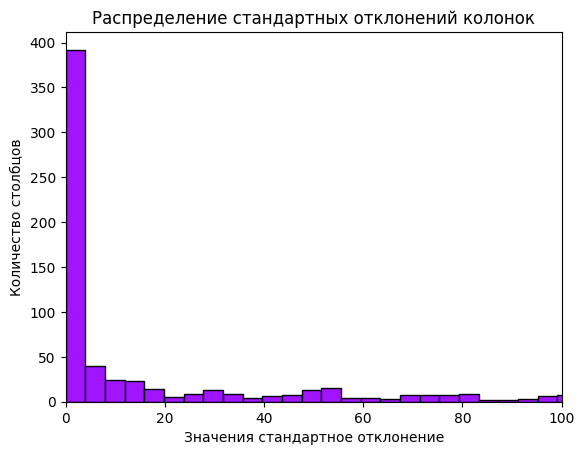

In [67]:
plt.hist(stdd, bins = 50000, color='#A115FE', edgecolor = 'black')

plt.title('Распределение стандартных отклонений колонок')
plt.xlabel('Значения стандартное отклонение')
plt.ylabel('Количество столбцов')
plt.ylabel('Количество столбцов')
plt.xlim(0, 100)

plt.show()

In [68]:
uniques = df.sample(n=50000).nunique()

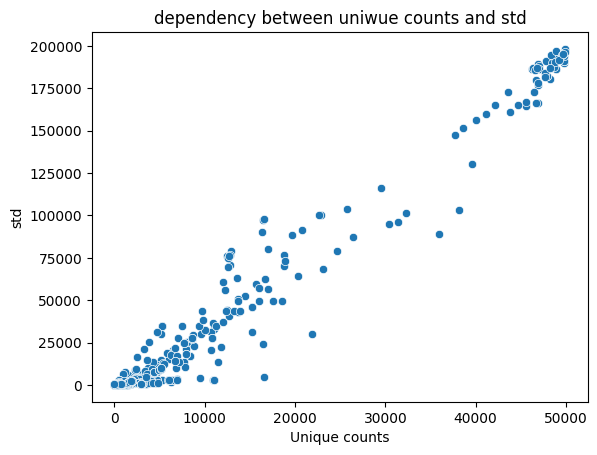

In [69]:
sns.scatterplot(data=df.sample(n=50000), x=uniques, y=stdd)
plt.xlabel('Unique counts')
plt.ylabel('std')
plt.title('dependency between uniwue counts and std')
plt.show()

In [12]:
# проверим схожесть распределений с помощью метода кульбака-лейблера))))
from scipy.stats import entropy
from scipy.interpolate import interp1d


In [10]:
df['feature5'].value_counts(normalize=True)

feature5
191    0.641248
1      0.011584
0      0.011179
2      0.010775
6      0.009628
         ...   
182    0.000012
184    0.000010
181    0.000002
190    0.000002
188    0.000002
Name: proportion, Length: 189, dtype: float64

In [11]:
df['feature1004'].value_counts(normalize=True)

feature1004
24     0.077887
23     0.076118
22     0.072021
25     0.067577
26     0.053975
         ...   
412    0.000002
295    0.000002
377    0.000002
438    0.000002
445    0.000002
Name: proportion, Length: 451, dtype: float64

In [16]:
interpolated_col1 = interp1d(range(len(df['feature5'].value_counts(normalize=True))), df['feature5'].value_counts(normalize=True))(range(len(df['feature1004'].value_counts(normalize=True))))
kl_divergence = entropy(df['feature1004'].value_counts(normalize=True), interpolated_col1)

ValueError: A value (189.0) in x_new is above the interpolation range's maximum value (188).

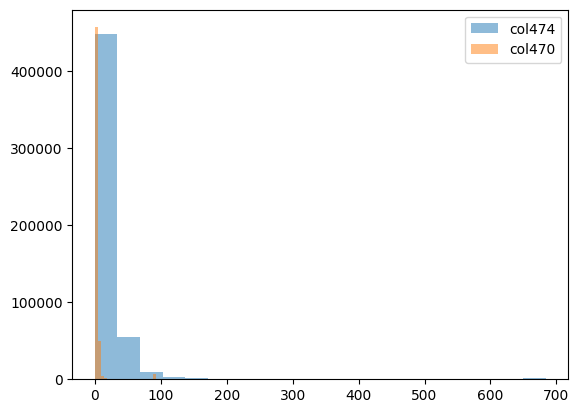

12763.216365791188


In [24]:
plt.hist(df['feature474'], bins=20, alpha=0.5,label='col474')
plt.hist(df['feature470'], bins=20, alpha=0.5,label='col470')
plt.legend()
plt.show()

hist_474, _ = np.histogram(df['feature474'], bins=20)
hist_470, _ = np.histogram(df['feature470'], bins=20)

euclidean_dist = np.linalg.norm(hist_474 - hist_470)
print(euclidean_dist)